# Team Project 2 - Interpolation

In this project, we investigate various aspects of polynomial interpolation and spline interpolation. 

There are several essential NumPy routines. 
<ul>
    <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.classes.html">Polynomial</a> routine enables identifying a vector $[a, b, c, \cdots]$ with a polynomial $a + bx + cx^2+ \cdots$ and manipulating it;</li>
    <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html">Linear algebra</a> routine could be used to do some basic linear algebra;</li>
    <li><a href="https://matplotlib.org/users/pyplot_tutorial.html">Pyplot</a> is used to plot graphs.</li>
</ul>
You may find some information and examples by clicking the name of each routine. Also, check the Python tutorial that I posted on Blackboard, at the beginning of this semester. 

For the first three problems, $f(x) = \frac{1}{1+x^2}$. We will compute several approximations of $f(x)$ on $[-5, 5]$, coming from various interpolations of sample points on the graph of $f(x)$. 

#### 1. (10 pts) Let $\mathrm{sample} = [x_0, x_1, \cdots, x_n]$ be a list of (not necessarily equally spaced) numbers such that $x_j < x_{j+1}$. Construct a python function Lagrange(sample) that calculates the polynomial interpolation $p_n(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_n, f(x_n))\}$ on $[x_0, x_n]$ using <em>Lagrange interpolation</em>. Using this, find the polynomial interpolation $p_{9}(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_9, f(x_9))\}$ of degree $\le 9$ with evenly spaced sample points $x_0 = -5, x_1, x_2, \cdots, x_9 = 5$ and sketch the graph of $f(x)$ and $p_{9}(x)$ on the same plane (for $-5 \le x \le 5$). 

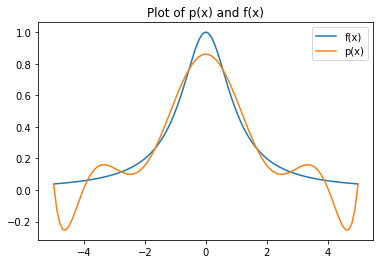

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import linalg as la

sample = [-5, -35/9, -25/9, -15/9, -5/9, 5/9, 15/9, 25/9, 35/9, 5]

def f(x):
    return 1/(1+x**2)

def l(i):
    j = 0
    li = 1
    while j < len(sample):
        if j != i:
            li *= (np.poly1d([sample[j]], True)/(sample[i]-sample[j]))
        j += 1
    return li
            
def Lagrange(sample):
    n = 0
    p = 0
    while n < len(sample):
        p += f(sample[n])*l(n)
        n += 1
    return p

xaxis = np.arange(-5, 5, 0.01)
yaxis = 1/(1+xaxis**2)
li = Lagrange(sample)
x = np.linspace(-5, 5, 100)
y = li(x)
plt.plot(xaxis, yaxis, label = 'f(x)')
plt.plot(x, y, label = 'p(x)')
plt.title("Plot of p(x) and f(x)")
plt.legend()
plt.show()


#### 2. (10 pts) Let $\mathrm{sample} = [x_0, x_1, \cdots, x_n]$ be a list of (not necessarily equally spaced) numbers such that $x_j < x_{j+1}$. Construct a python function DivDiff(sample) that calcuates the polynomial interpolation $p_n(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_n, f(x_n))\}$ using <em>divided differences</em>. Using this, find the polynomial interpolation $p_9(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_9, f(x_9))\}$ with evenly spaced sample points $x_0 = 5, x_1, x_2, \cdots, x_9 = 5$ and sketch the graph of $f(x)$ and $p_9(x)$ on the same plane (for $-5 \le x \le 5$).  

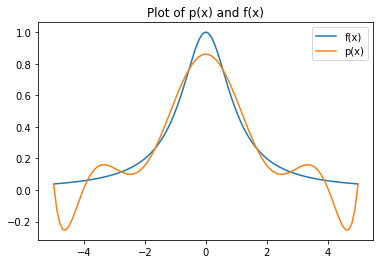

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import linalg as la

sample = [-5, -35/9, -25/9, -15/9, -5/9, 5/9, 15/9, 25/9, 35/9, 5]
#sample = [-5, -2, -1, 4, 5]

def f(x):
    return 1/(1+x**2)

def fx(i, j): #i < j
    if j-i == 1:
        return (f(sample[j])-f(sample[i]))/(sample[j]-sample[i])
    else:
        return (fx(i+1, j)-fx(i, j-1))/(sample[j]-sample[i])

def poly(n):
    i = 0
    polynomial = 1
    while i < n:
        polynomial *= np.poly1d([sample[i]], True)
        i += 1
    return polynomial
    
def DivDiff(sample):
    n = 1
    p = f(sample[0])
    while n < len(sample):
        p += fx(0, n)*poly(n)
        n += 1
    return p

xaxis = np.arange(-5, 5, 0.01)
yaxis = 1/(1+xaxis**2)
dd = DivDiff(sample)
x = np.linspace(-5, 5, 100)
y = dd(x)
plt.plot(xaxis, yaxis, label = 'f(x)')
plt.plot(x, y, label = 'p(x)')    
plt.title("Plot of p(x) and f(x)")
plt.legend()
plt.show()     

#### 3. (10 pts) Let $\mathrm{sample} = [x_0, x_1, \cdots, x_n]$ be a list of (not necessarily equally spaced) numbers such that $x_j < x_{j+1}$. Construct a python function CubicSpline(sample) that calcuates the natural cubic spline function $S(x)$ with the sample points $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_n, f(x_n))\}$. Using this, find the natural cubic spline function $S(x)$ with evenly spaced sample points $x_0 = -5, x_1, x_2, \cdots, x_9 = 5$ and sketch the graph of $f(x)$ and $S(x)$ on the same plane (for $-5 \le x \le 5$). 

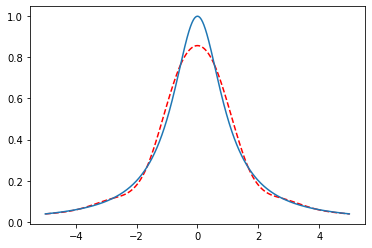

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import linalg as la

sample = [-5, -35/9, -25/9, -15/9, -5/9, 5/9, 15/9, 25/9, 35/9, 5]
#sample = [-5, -2, -1, 4, 5]

def f(x):
    return 1/(1+x**2)

def CubicSpline(sample):
    A = np.ndarray(shape=(len(sample)-2, len(sample)-2), dtype='float')
    b = []
    h = []
    aj = []
    bj = []
    cj = []
    dj = []
    sj = []

    for i in range(len(sample)):
        aj.append(f(sample[i]))
    
    for i in range(len(sample)-1):
        h.append(sample[i+1]-sample[i])
    
    for i in range(len(sample)-2):
        for j in range(len(sample)-2):
            A[i,j] = 0
            
    for i in range(len(sample)-2):
        for j in range(len(sample)-2):
            if i==j:
                A[i,j]=2*(h[i]+h[i+1])
                if i != len(sample)-3:
                    A[i,j+1] = h[j+1]
                if i != 0:
                    A[i, j-1] = h[i]
                    
    for i in range(len(sample)-2):
        b.append((3/h[i+1])*(aj[i+2]-aj[i+1])-3/h[i]*(aj[i+1]-aj[i]))

    cj.append(0)
    for i in range(len(sample)-2):
        cj.append(la.solve(A,b)[i])
    cj.append(0)
    
    for i in range(len(sample)-1):
        bj.append(1/h[i]*(aj[i+1]-aj[i])-h[i]/3*(2*cj[i]+cj[i+1]))
    
    for i in range(len(sample)-1):
        dj.append(1/(3*h[i])*(cj[i+1]-cj[i]))
    
    for i in range(len(sample)-1):
        sj.append((np.poly1d([aj[i]]))+(bj[i]*np.poly1d([sample[i]], True))+(cj[i]*np.poly1d([sample[i], sample[i]], True))+(dj[i]*np.poly1d([sample[i], sample[i], sample[i]], True)))

    return sj

cs = CubicSpline(sample)
for i in range(len(sample)-1):
    x = np.linspace(sample[i], sample[i+1], 100)
    y = cs[i](x)
    plt.plot(x, y,'--', color = 'red')
xaxis = np.arange(-5, 5, 0.01)
yaxis = 1/(1+xaxis**2)
plt.plot(xaxis, yaxis)
plt.show()

#### 4. (20 pts) 
In computer graphics, <b>vectorization</b> is the conversion of raster graphics into vector graphics. 

Roughly, raster graphics is a graphic format that consists of a collection of colored dots. Examples include JPG, GIF, and PNG formats. Raster graphics are resolution dependent, meaning they cannot scale up to an arbitrary resolution without loss of apparent quality. (If you zoom in a jpg file, then you can see many colored squares.)

On the other hand, vector graphics are defined in terms of points connected by lines and curves to form polygons and other shapes. Typical examples are font files, SVG, and PDF. Because they encode relevant mathematical data, it could be easily scaled up without any loss of quality. 

Vectorization or image tracing is a method to convert a given raster graphic data into a vector graphic format. This project will investigate one of the simplest kinds of image tracing by using the spline function. Consider the following image of a concept car:

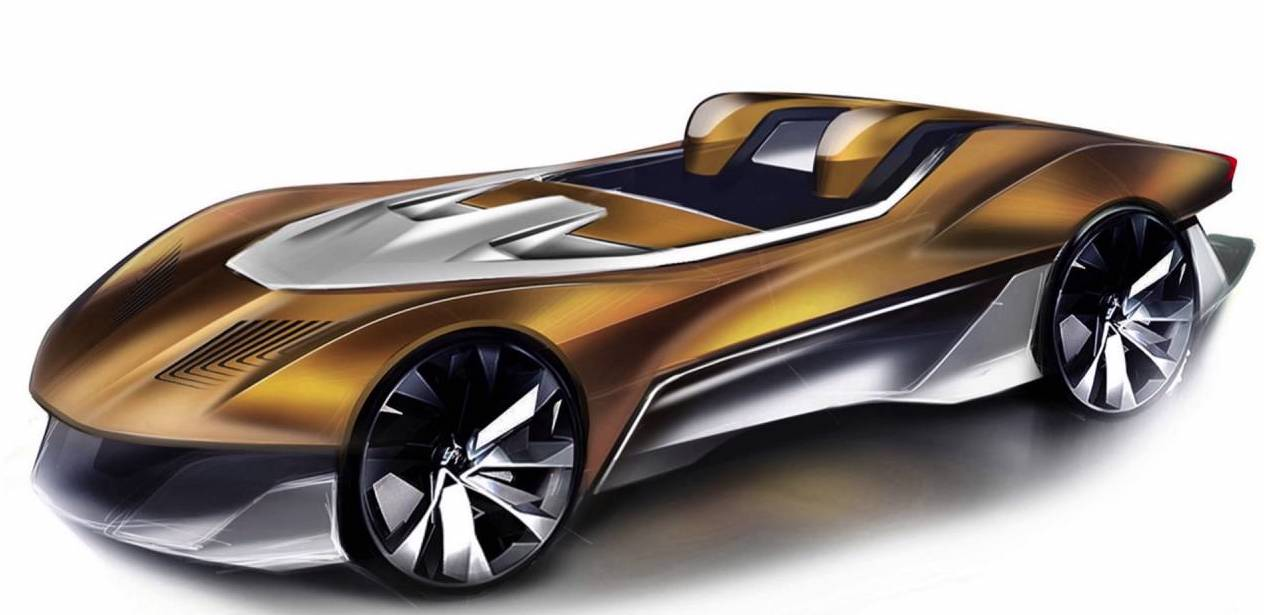

#### What you need to do is trace the contour of the upper part of the car's body by using natural cubic spline functions. More precisely, you should calculate a natural cubic spline function $S(x)$ that describes the upper outline of the car, starting from the orange part's leftmost point to the rightmost point to the taillight. 

<ol>
    <li>By using some graphic tool such as Microsoft Paint or Photoshop, find the coordinates of several sample points.</li>
    <li>Compute the natural cubic spline function connecting the sample points.</li>
    <li>Plot your spline function over the image of </li>
</ol>
Your graph of the spline function should have no significant error (I know this is somewhat subjective, but...) compare to the outline of the original image. 10 pts for the correctness of the code. The remaining 10 points are for the best performance, in terms of the <em>number of sample points</em>. For example, the team using the smallest number of sample points will get 10 pts, the next team will get 9 pts, etc. Keep in mind that your spline should not have any significant difference with the original image. It is important which sample points you use. Try several examples and get some lessons. 

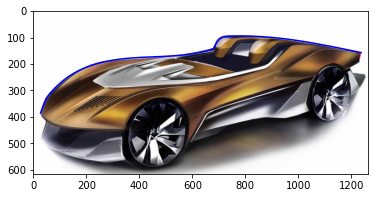

In [550]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import linalg as la

sample = [27 , 49 , 64 , 220, 672, 683, 685, 724, 735, 1237]
values = [385, 330, 309, 205, 145, 136, 132, 97 , 96 , 157 ]

def CubicSpline(sample):
    A = np.ndarray(shape=(len(sample)-2, len(sample)-2), dtype='float')
    b = []
    h = []
    aj = []
    bj = []
    cj = []
    dj = []
    sj = []

    for i in range(len(sample)):
        aj.append(values[i])
    
    for i in range(len(sample)-1):
        h.append(sample[i+1]-sample[i])
    
    for i in range(len(sample)-2):
        for j in range(len(sample)-2):
            A[i,j] = 0
            
    for i in range(len(sample)-2):
        for j in range(len(sample)-2):
            if i==j:
                A[i,j]=2*(h[i]+h[i+1])
                if i != len(sample)-3:
                    A[i,j+1] = h[j+1]
                if i != 0:
                    A[i, j-1] = h[i]
                    
    for i in range(len(sample)-2):
        b.append((3/h[i+1])*(aj[i+2]-aj[i+1])-3/h[i]*(aj[i+1]-aj[i]))

    cj.append(0)
    for i in range(len(sample)-2):
        cj.append(la.solve(A,b)[i])
    cj.append(0)
    for i in range(len(sample)-1):
        bj.append(1/h[i]*(aj[i+1]-aj[i])-h[i]/3*(2*cj[i]+cj[i+1]))
    
    for i in range(len(sample)-1):
        dj.append(1/(3*h[i])*(cj[i+1]-cj[i]))
    
    for i in range(len(sample)-1):
        sj.append((np.poly1d([aj[i]]))+(bj[i]*np.poly1d([sample[i]], True))+(cj[i]*np.poly1d([sample[i], sample[i]], True))+(dj[i]*np.poly1d([sample[i], sample[i], sample[i]], True)))

    return sj

cs = CubicSpline(sample)
for i in range(len(sample)-1):
    x = np.linspace(sample[i], sample[i+1], 100)
    y = cs[i](x)
    plt.plot(x, y,'-', color = 'blue')
plt.imshow(plt.imread("Car.jpeg"))
plt.show()

1. (10 pts)

2. (10 pts)

3. (10 pts)

4. (20 pts)

(10 + 10 + 10 + 20 = 50)

Good job!